In [1]:

from time import time



from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import *

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split


from time import time
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN, BatchNormalization
from keras.datasets import imdb
import keras.layers.advanced_activations
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM, Embedding
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import tensorflow as tf

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
os.getcwd()
#os.chdir('/home/jgmeyer2/MHCpeptides/')

'C:\\Users\\qdickinson\\Jupyter Notebooks\\20201230_train_new_model_MHC_all5'

In [3]:
inp = pd.read_csv("A1101_binding.txt", header=0, low_memory=False, sep="\t")
inp.index = range(len(inp))
inp.head()

inp = inp.groupby('Sequence', as_index=False).mean()
inp

,Sequence,Intensity
0,AAAATSAGTR,0.253411
1,AAASSLLYK,0.748583
2,AAATSAGTR,0.231444
3,AAATSAGTRR,0.341356
4,AAAYFVGYLK,1.000000
...,...,...
6278,YYKDDISYF,0.084687
6279,YYLEKANKI,0.084687
6280,YYPEDPVKL,0.084687
6281,YYQLCQHLK,0.469617


### group strings that have the same first 8 characters

In [4]:
peptides = inp['Sequence'].tolist()
#peptides

In [5]:
peptides_sorted = inp['Sequence'].tolist()
peptides_sorted.sort()
peptides_sorted


['AAAATSAGTR',
 'AAASSLLYK',
 'AAATSAGTR',
 'AAATSAGTRR',
 'AAAYFVGYLK',
 'AACAMLLVK',
 'AADEPPLVR',
 'AADFPGIAR',
 'AADKAAAAY',
 'AAERGPGQML',
 'AAFLDDNAF',
 'AAFQSSMTK',
 'AAGIAWIPY',
 'AAGIIILMEY',
 'AAGLPAIFV',
 'AAHARFVAA',
 'AAIDGEYRLK',
 'AAIDLSHFL',
 'AAIDRQVSVK',
 'AAISDYDYY',
 'AAISKLGINY',
 'AAKKKGASL',
 'AAKYVEHDPR',
 'AALDGTFQR',
 'AALDGTFQRK',
 'AALDLSHFL',
 'AALEGLSGF',
 'AALFMYYAK',
 'AALFMYYAKR',
 'AALSSLAKH',
 'AAMQRKLEK',
 'AAMVLLLRK',
 'AANEIRISK',
 'AANEMGLIEK',
 'AANTVIWDY',
 'AARILSEKR',
 'AARILSEKRK',
 'AASCGGAVF',
 'AATIQTPTK',
 'AAVDLSHFL',
 'AAVTLNRIK',
 'AAYFVGYLK',
 'AAYYFMKFR',
 'AAYYFMKFRR',
 'ACMDGFEVV',
 'ACNKIKGKK',
 'ACQEAVKLK',
 'ACRCGRFQK',
 'ACREQQLPV',
 'ACYNTCYCK',
 'ADFKLFFRW',
 'ADLRFASEF',
 'AEALLADGL',
 'AEDMLNPNY',
 'AEFKYIAAV',
 'AEFPVGSTA',
 'AEFWDVFLS',
 'AEGTGITHL',
 'AEHDPWWAV',
 'AEHFENQVL',
 'AEIDRSFKP',
 'AEILSGRVI',
 'AEKSRGRRI',
 'AEMGGHAER',
 'AEMKTDAA',
 'AEMKTDAAT',
 'AEMKTDAATL',
 'AEMRAYHGF',
 'AEMRETHWL',
 'AENGWGFYF',
 'AENK

In [6]:
### get the first 8 amino acids for the 'core sequence'
first8 = [x[:8] for x in peptides]
#first8

In [7]:
print(len(first8))
print(len(set(first8)))

6283
6010


In [8]:
print(len(first8))
print(len(set(first8)))

6283
6010


In [9]:
unique_cores = set(first8)

In [10]:
### make a dict with the indexes of the positions for each of the unique core sequences
core_seqs_dict = {}
n=0
for x in list(unique_cores):
    #print(n)
    core_seqs_dict[n] = [i for i, y in enumerate(first8) if y == x ]
    n+=1

In [11]:
core_seqs_dict[202]

[3430]

In [12]:
len(inp['Sequence'])

6283

In [13]:
# are there duplicate peptides?
len(set(inp['Sequence']))

6283

In [14]:
inp['namelen']= [len(str(i)) for i in inp['Sequence']]
input1 = inp[ (inp['namelen'] >= 2) ]
#parameters, max length of sequence with
maxlen = max([len(x) for x in input1.Sequence]) ### list comprehension to get max length of sequences

## encoding sequence by index for embedding layer

In [15]:
### make vocabulary for encoding
seq = input1['Sequence']
vocab = set(''.join([str(i) for i in seq]))
vocab.add('END')  # not using END cause they are all the same length
len_vocab = len(vocab)
print(vocab)

{'END', 'G', 'V', 'L', 'K', 'N', 'P', 'H', 'E', 'Y', 'A', 'I', 'W', 'R', 'S', 'C', 'F', 'T', 'Q', 'M', 'D'}


In [16]:
len_vocab

21

In [17]:
### always use alphabetical character index in the future
vocab_list = list(vocab)
vocab_list.sort()
vocab_list

['A',
 'C',
 'D',
 'E',
 'END',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [18]:
char_index = dict((vocab_list[i], i) for i in range(len(vocab_list)))
X = []
x_name = [str(i)[0:maxlen] for i in seq]
for i in x_name:
    tmp = [char_index[j] for j in str(i)]
    for k in range(0,maxlen - len(str(i))):
        tmp.append(char_index["END"])
    X.append(tmp)

In [19]:
char_index

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'END': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [20]:
# compare the encoding with the sequences using above dictionary
print(peptides[0:6])
print(X[0:6])

['AAAATSAGTR', 'AAASSLLYK', 'AAATSAGTR', 'AAATSAGTRR', 'AAAYFVGYLK', 'AACAMLLVK']
[[0, 0, 0, 0, 17, 16, 0, 6, 17, 15], [0, 0, 0, 16, 16, 10, 10, 20, 9, 4], [0, 0, 0, 17, 16, 0, 6, 17, 15, 4], [0, 0, 0, 17, 16, 0, 6, 17, 15, 15], [0, 0, 0, 20, 5, 18, 6, 20, 10, 9], [0, 0, 1, 0, 11, 10, 10, 18, 9, 4]]


In [22]:
# Create an empty list 
all_int_list =[] 
# Iterate over each row 
for index, rows in input1.iterrows(): 
    # Create list for the current row 
    my_list=[rows.Intensity] #[rows.CRT, 
    # append the list to the final list 
    all_int_list.append(my_list) 
  
# Print the list 
print(all_int_list[0]) 

[0.25341089]


In [23]:
#intensities = input1['INTENSITY']
np.asarray(all_int_list).shape

(6283, 1)

In [24]:
# some values are below 0
min(all_int_list)

[-0.365513938]

In [25]:
# function to plot distributions of the intensity values across MHC
def pltgroup(ylabels):
    ''' only plots four histograms of y values to quickly compare distributions'''
    plt.rcParams['figure.figsize'] = [20, 20] 
    fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
    p0 = ax1.hist(ylabels, bins=100)
    #p1 = ax2.hist(ylabels[:,1], bins=100)
    ax1.set_title("CRT")
    
    plt.xlabel("tfm intensity")
    plt.ylabel("number of examples")

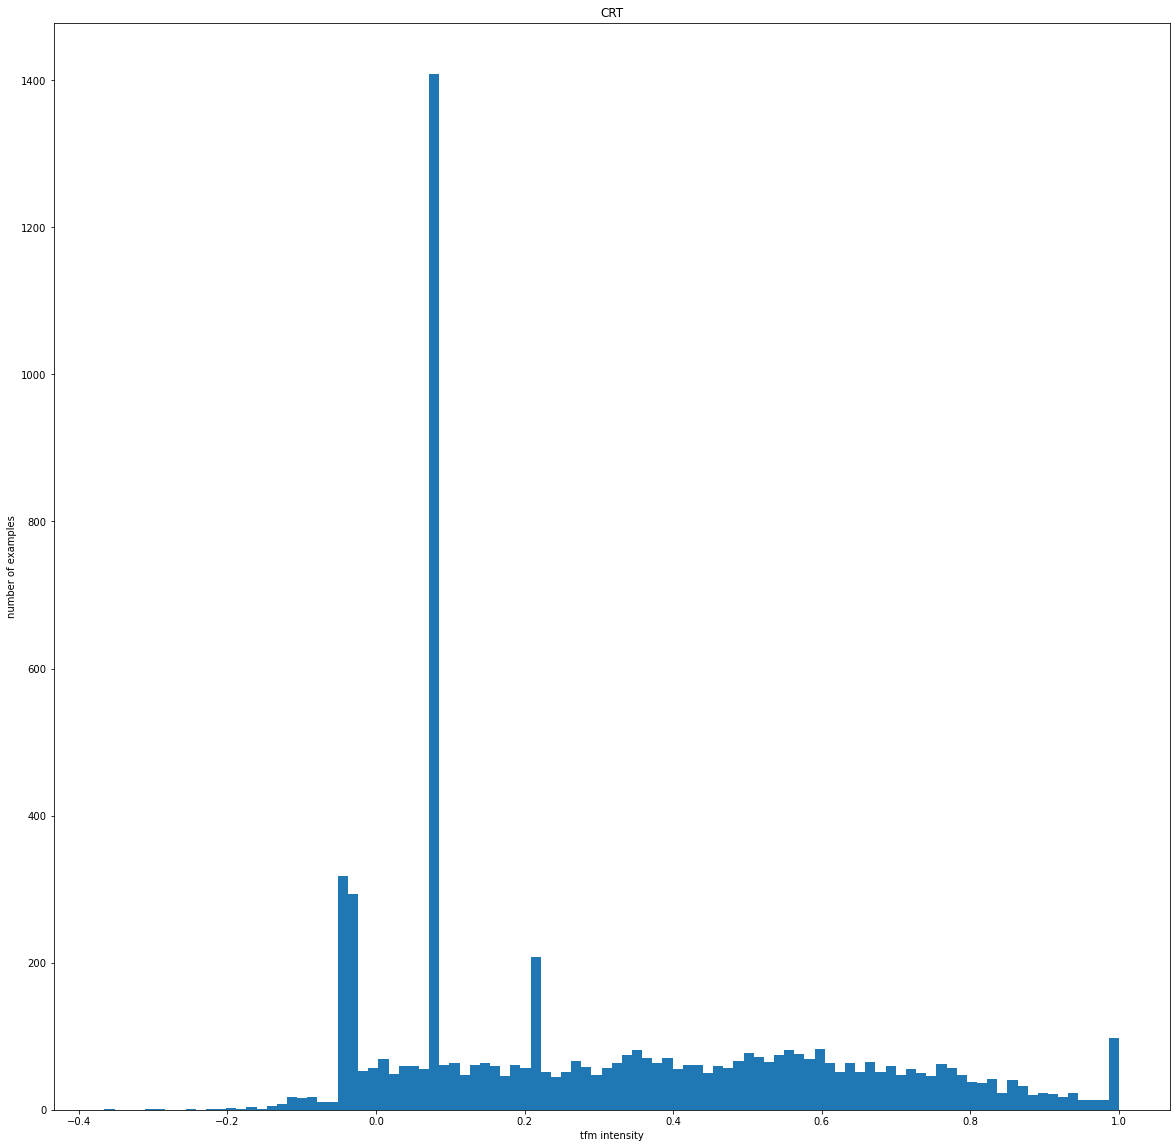

In [26]:
pltgroup(np.asarray(all_int_list))

In [27]:
X = np.asarray(X)
Y = np.asarray(all_int_list)

(6283, 10)
(6283, 1)


In [29]:
## train/test split based on the core 8 AA sequences
coretrainall, coretest = train_test_split(range(0, len(core_seqs_dict)), test_size=0.10, random_state=42)
# split train into train/validation
coretrain, coreval = train_test_split(coretrainall, test_size=0.20, random_state=42)

In [30]:
coretrain[0:10]

[4056, 2175, 215, 75, 4603, 4909, 5255, 4997, 1921, 3096]

In [31]:
print(len(coretrainall))
print(len(coretrain))
print(len(coreval))
print(len(coretest))
print(len(coretrain)+ len(coretest)+len(coreval))

5409
4327
1082
601
6010


In [32]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coretrain]
trainindex = []
for x in tmplist:
    trainindex+=x
len(trainindex)

4522

In [33]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coreval]
valindex = []
for x in tmplist:
    valindex+=x
len(valindex)

1132

In [34]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[j] for j in coretest]
testindex = []
for x in tmplist:
    testindex += x
len(testindex)

629

In [35]:
Xtrain = X[trainindex]
Xval = X[valindex]
Xtest = X[testindex]

Ytrain = Y[trainindex]
Yval = Y[valindex]
Ytest = Y[testindex]

4522
1132
629
4522
1132
629


In [36]:
Xtestseq = inp['Sequence'][testindex]

In [42]:
## save numpy arrays of each for the hyperas hyperparameter search loop
np.savetxt('20210524_A1101_xtrain.txt', Xtrain)
np.savetxt('20210524_A1101_xval.txt', Xval)
np.savetxt('20210524_A1101_xtest.txt', Xtest)
np.savetxt('20210524_A1101_ytrain.txt', Ytrain)
np.savetxt('20210524_A1101_yval.txt', Yval)
np.savetxt('20210524_A1101_ytest.txt', Ytest)

### check that the train and test sets have similar class distro

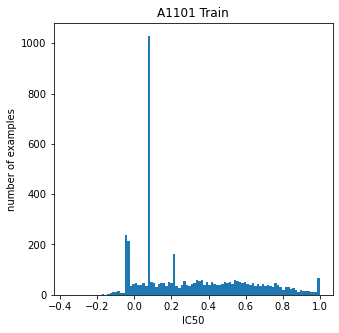

In [3]:
ylabels = np.loadtxt('20210524_A1101_ytrain.txt') # train set

plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
p0 = ax1.hist(ylabels, bins=100)
#p1 = ax2.hist(ylabels[:,1], bins=100)
ax1.set_title("A1101 Train")

plt.xlabel("IC50")
plt.ylabel("number of examples")
plt.savefig('ytrain_a1101.svg')
plt.show()

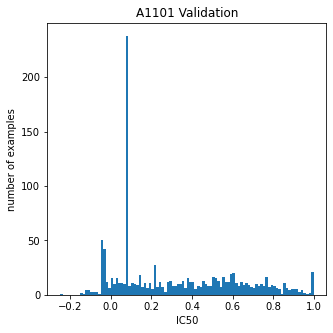

In [4]:
ylabels = np.loadtxt('20210524_A1101_yval.txt') # validation set

plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
p0 = ax1.hist(ylabels, bins=100)
#p1 = ax2.hist(ylabels[:,1], bins=100)
ax1.set_title("A1101 Validation")

plt.xlabel("IC50")
plt.ylabel("number of examples")
plt.savefig('yval_a1101.svg')
plt.show()

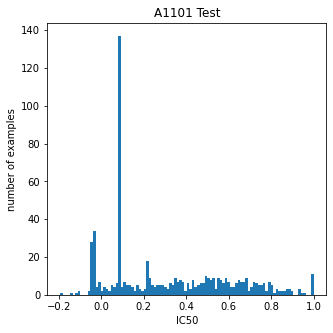

In [2]:
ylabels = np.loadtxt('20210524_A1101_ytest.txt') # test set
plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
p0 = ax1.hist(ylabels, bins=100)
#p1 = ax2.hist(ylabels[:,1], bins=100)
ax1.set_title("A1101 Test")

plt.xlabel("IC50")
plt.ylabel("number of examples")
plt.savefig('ytest_A1101.svg')
plt.show()

6283
6283


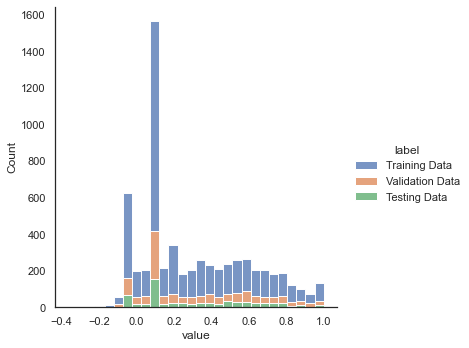

In [61]:
import seaborn as sns
import pandas as pd
#ytrain = np.loadtxt('20210429_CRT_CCS_ytrain.txt') # train set
#yval = np.loadtxt('20210429_CRT_CCS_yval.txt')
#ytest = np.loadtxt('20210429_CRT_CCS_ytest.txt')

ytrain = np.loadtxt('20210524_A1101_ytrain.txt') # train set
yval = np.loadtxt('20210524_A1101_yval.txt')
ytest = np.loadtxt('20210524_A1101_ytest.txt')

labels = []

for y in ytrain:
    labels.append("Training Data")
for y in yval:
    labels.append("Validation Data")
for y in ytest:
    labels.append("Testing Data")
    
yall = []
for value in ytrain:
    yall.append(value)
for value in yval:
    yall.append(value)
for value in ytest:
    yall.append(value)
    
print(len(labels))
print(len(yall))

ydf = pd.DataFrame(list(zip(labels, yall)), columns =['label', 'value'])

sns.set_style("white") 
sns.set(font_scale = 4.5)
#fig = plt.gcf()
#sns.set_size_inches(100,100)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white") 
sns.displot(ydf, x="value", hue="label", multiple="stack" )
plt.savefig("a1101-datasplit.svg")

# quick test one parameter set showing model works

In [6]:
keras.__version__
tf.__version__

'2.3.1'

In [ ]:
#Model for A1101 alleles

os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"
X_train = np.loadtxt('20210524_A1101_xtrain.txt')
X_val = np.loadtxt('20210524_A1101_xval.txt')
Y_train = np.loadtxt('20210524_A1101_ytrain.txt')
Y_val = np.loadtxt('20210524_A1101_yval.txt')

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(output_dim=50 , input_dim=21, input_length=10))

model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(10,21)))
model.add(tf.keras.layers.Dropout(0.5333324976566283))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.5630981705545706))
#model.add(tf.keras.layers.LSTM(128, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64))

model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.7995520644054326))

model.add(tf.keras.layers.Dense(1))
optimizermodel = tf.keras.optimizers.Adam(0.001)
optimizermodel.learning_rate.assign(0.01)
#print(optimizer.learning_rate)
model.compile(loss='mse', optimizer = optimizermodel,  metrics=['mse'])

hist = model.fit(X_train, Y_train,
          batch_size=5000,
          epochs= 200,
          verbose=2,
          validation_data=(X_val, Y_val))


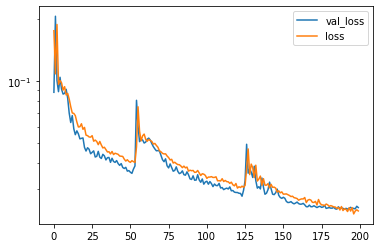

In [4]:
# plot validation and training loss to assess overfitting
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.savefig('lossplot_a1101.svg')

In [175]:
model.summary() # best model architecture

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 10, 50)            1050      
_________________________________________________________________
lstm_46 (LSTM)               (None, 10, 128)           91648     
_________________________________________________________________
dropout_65 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
dense_42 (Dense)             (None, 10, 64)            8256      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 10, 64)            0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
dense_43 (Dense)             (None, 10, 1)           

In [5]:
model.save('20210608_A1101_final.model') # save model for later

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: 20210608_A1101_final.model\assets


In [4]:
print (best_run0)

{'Dropout': 0.04999730587706014, 'Dropout_1': 0.295346240262041, 'Dropout_2': 0.3257983840159514, 'assign': 4, 'batch_size': 2, 'epochs': 0}


# Get model predictions, inverse transform, and compare

In [2]:

X_test = np.loadtxt('20210524_A1101_xtest.txt')
y_test = np.loadtxt('20210524_A1101_ytest.txt')

In [4]:
import tensorflow as tf

In [3]:
#from tensorflow.compat.v1.keras.backend import get_session
#tf.compat.v1.disable_v2_behavior()
#shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
model = tf.keras.models.load_model('20210608_A1101_final.model')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            1050      
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           91648     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0

0.10119888
[[0.10119888 0.22562616 0.21545234 ... 0.71838939 0.63849437 0.16979809]
 [0.08468665 0.08468665 0.36474236 ... 0.87187405 0.68716811 0.23465501]]


c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SpearmanrResult(correlation=0.807895864519498, pvalue=4.055416425407873e-146)


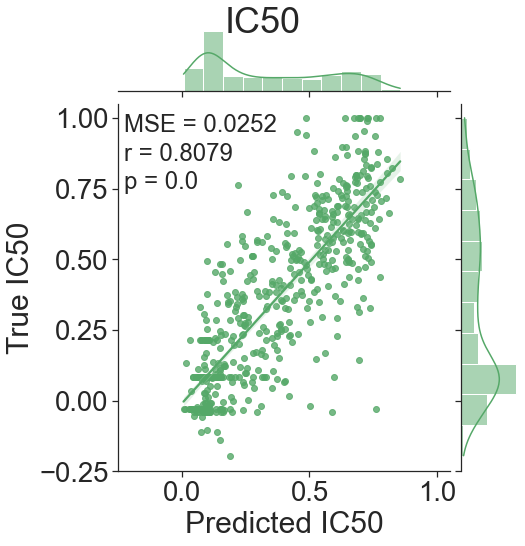

In [7]:
import sklearn
import scipy
import seaborn as sns
ccs = []
CCSpred = []



for value in y_pred:
    CCSpred.append(value[0])

print(CCSpred[0])
    
CCSreal = []
for value in y_test:
    CCSreal.append(value)

    
ccs.append(CCSpred)
ccs.append(CCSreal)
print(np.asarray(ccs))
dccs = {'Predicted IC50': CCSpred, 'True IC50': CCSreal}





dfccs = pd.DataFrame(data = dccs)





#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted IC50', 'True IC50', data = dfccs, kind='reg', height=8, color = 'g', xlim = (-0.25,1.05), ylim = (-0.250,1.05))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("IC50")
prCCS, pCCS = scipy.stats.spearmanr(CCSpred, CCSreal)
print(scipy.stats.spearmanr(CCSpred, CCSreal))
mseCCS=round(sklearn.metrics.mean_squared_error(CCSpred, CCSreal),4)
j.ax_joint.text(-0.225,0.95,"MSE = " + str(mseCCS), fontsize=24)
j.ax_joint.text(-0.225,0.85,"r = " + str(round(prCCS,4)), fontsize=24)
j.ax_joint.text(-0.225,0.75,"p = " + str(round(pCCS,2)), fontsize=24)
plt.savefig('A1101realvspredicted.png')
plt.savefig('A1101realvspredicted.svg')
plt.show()

In [8]:
import scipy
#print(y_pred[:,1])
#print(y_test)
print(scipy.stats.spearmanr(y_pred[:,0], y_test))
#scipy.stats.spearmanr(y_pred[:,1], y_test[:,1])


SpearmanrResult(correlation=0.8598036014715501, pvalue=0.0)
